<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("../../DATA/housing.data", header=None, names=names, delim_whitespace=True)

In [5]:
# Head
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [6]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

C:\Users\huyph\.conda\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\huyph\.conda\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RM', ylabel='Count'>

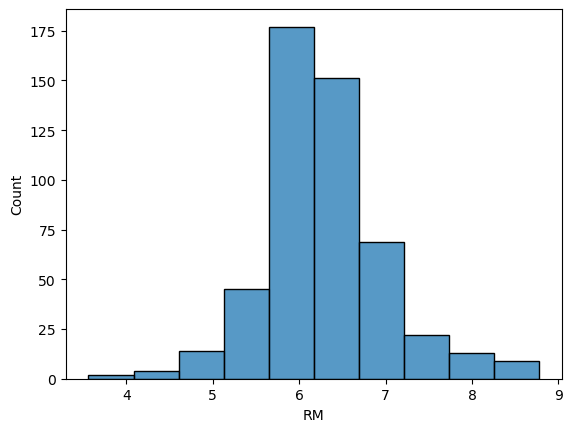

In [8]:
#  ANSWER
sns.histplot(data=data, x='RM', bins=10)

##### 2. Plot Histogram of `MEDV`

C:\Users\huyph\.conda\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\huyph\.conda\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MEDV', ylabel='Count'>

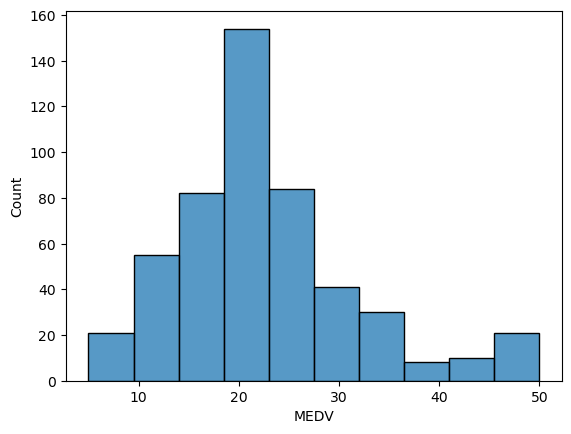

In [9]:
# ANSWER
sns.histplot(data=data, x='MEDV', bins=10)

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

<Axes: xlabel='RM', ylabel='MEDV'>

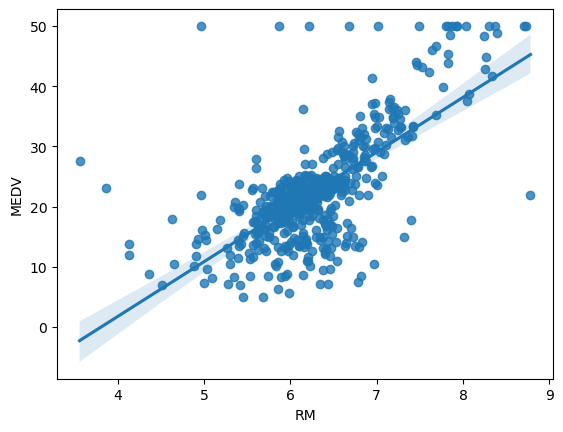

In [11]:
# ANSWER
sns.regplot(data=data, x='RM', y='MEDV')

##### 3.B Is there any trend? State your observation.

**ANSWER:**: ...

There seems to be a **strong positive linear relationship** between 'RM' & 'MEDV'.

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, it is a large house. Otherwise the house is small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference in the mean of prices between the large and small houses.
    H1: There is a difference in the mean of prices between the large and small houses.
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [12]:
# ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data
- Large House: Houses which have more than 6 rooms.
- Small House: Houses which have no more than 6 rooms.

Take sample of 100 houses in each dataset.

In [15]:
# ANSWER
large_house = data[data['RM'] > 6].sample(n=100, random_state=25)
small_house = data[data['RM'] <= 6].sample(n=100, random_state=25)

large_house.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
6    0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311.0   
338  0.03306   0.0   5.19     0  0.515  6.059  37.3  4.8122    5  224.0   
448  9.32909   0.0  18.10     0  0.713  6.185  98.7  2.2616   24  666.0   
198  0.03768  80.0   1.52     0  0.404  7.274  38.3  7.3090    2  329.0   
178  0.06642   0.0   4.05     0  0.510  6.860  74.4  2.9153    5  296.0   
349  0.02899  40.0   1.25     0  0.429  6.939  34.5  8.7921    1  335.0   
188  0.12579  45.0   3.44     0  0.437  6.556  29.1  4.5667    5  398.0   
264  0.55007  20.0   3.97     0  0.647  7.206  91.6  1.9301    5  264.0   
480  5.82401   0.0  18.10     0  0.532  6.242  64.7  3.4242   24  666.0   
278  0.07978  40.0   6.41     0  0.447  6.482  32.1  4.1403    4  254.0   

     PTRATIO       B  LSTAT  MEDV  
6       15.2  395.60  12.43  22.9  
338     20.2  396.14   8.51  20.6  
448     20.2  396.90  18.13  14.1  
198     12.6  392.20   6.62  34.6  
178     16.6  391.27   6.92  29.9  
349     19.7  389.85   5.89  26.6  
188     15.2  382.84   4.56  29.8  
264     13.0  387.89   8.10  36.5  
480     20.2  396.90  10.74  23.0  
278     17.6  396.90   7.19  29.1

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

C:\Users\huyph\.conda\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\huyph\.conda\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\huyph\.conda\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\huyph\.conda\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

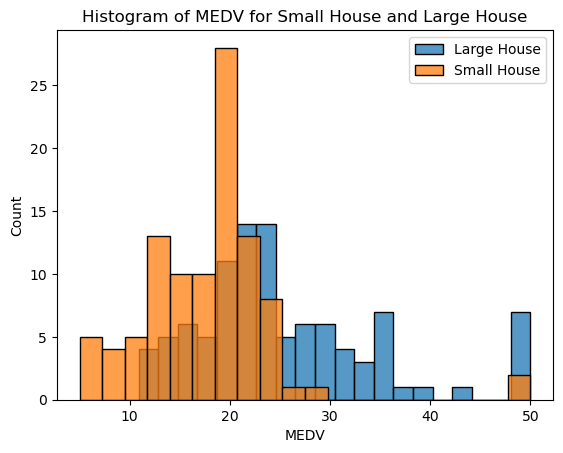

In [21]:
# ANSWER
sns.histplot(data=large_house, x='MEDV', bins=20, label='Large House')
sns.histplot(data=small_house, x='MEDV', bins=20, label='Small House')

#Set axis labels, legend, and title
plt.title('Histogram of MEDV for Small House and Large House')
plt.legend(loc='upper right')

##### 7. Calculate Variance

Calculate variance for both samples.

In [25]:
# ANSWER
large_house_var = np.var(large_house['MEDV'])
small_house_var = np.var(small_house['MEDV'])

print(large_house_var)
print(small_house_var)

87.42232400000005
45.488779000000015


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation.

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

In [27]:
# ANSWER
std = np.sqrt((large_house_var + small_house_var) / 2)
std

8.152027447206004

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [28]:
# ANSWER
t_score = (large_house['MEDV'].mean() - small_house['MEDV'].mean()) / (std * np.sqrt(2 / 100))
t_score

6.709338244871255

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [30]:
# ANSWER
degf = 2 * 100 - 2

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t)

In [31]:
# ANSWER
p_value = 1 - stats.t.cdf(abs(t_score), df=degf)
p_value

1.0028267105610666e-10

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a function which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [32]:
# ANSWER
def test_result_interpret(p_value, alpha):
    if p_value <= alpha:
        print(f"Because {p_value} <= {alpha}, the Null Hypothesis is rejected")
    else:
        print(f"Because {p_value} > {alpha}, fail to reject the Null Hypothesis")

In [33]:
# ANSWER
test_result_interpret(p_value, alpha)

Because 1.0028267105610666e-10 <= 0.05, the Null Hypothesis is rejected


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [35]:
# ANSWER
def cal_t_score_and_p_value(sample1, sample2):
    # calculate the no of obs
    n1 = len(sample1)
    n2 = len(sample2)
    
    # calculate the variance
    var1 = np.var(sample1)
    var2 = np.var(sample2)
    
    # calculate the degree of freedom
    degf = n1 + n2 - 2
    
    # calculate the standard deviation
    std = np.sqrt((var1 + var2) / 2)
    
    # calculate t_score
    t_score = (sample1.mean() - sample2.mean()) / (std * np.sqrt(2 / n1))
    
    # calculate p_value
    p_value = 1 - stats.t.cdf(abs(t_score), df=degf)
    
    print(f"t_score: {t_score}\np_value: {p_value}")
    return t_score, p_value

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [37]:
# ANSWER
t_score2, p_value2 = stats.ttest_ind(large_house['MEDV'], small_house['MEDV'])
print(t_score2)
print(p_value2)

6.675707264945879
2.419160278877421e-10




---



---



> > > > > > > > > Â© 2023 Institute of Data


---



---



